In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()  # cool seaborn style plots

Path for the saved results:

In [2]:
path = './results/'

Look at saved results:

In [4]:
os.listdir(path)

['.DS_Store',
 'DDPG_Pendulum-v0_4.npy',
 'DDPG_Pendulum-v0_1.npy',
 'DDPG_Pendulum-v0_0.npy',
 'DDPG_Pendulum-v0_2.npy',
 'DDPG_Pendulum-v0_3.npy',
 'TD3_Pendulum-v0_1.npy',
 'TD3_Pendulum-v0_0.npy',
 'TD3_Pendulum-v0_2.npy',
 'TD3_Pendulum-v0_3.npy',
 'TD3_Pendulum-v0_4.npy']

Load saved results:

In [147]:
def load_data(path, policy_name, env_name, eval_freq=5000):
    data = pd.DataFrame()
    filename = f'{policy_name}_{env_name}_'
    
    # Load matching results from the path
    for file in os.listdir(path):
        match = file.split(filename,1)
        if len(match) > 1:
            seed = match[1]
            data['Seed ' + seed.split('.')[0]] = np.load(path + filename + seed)
    
    # Reorder columns according to seed number
    data = data.reindex(sorted(data.columns), axis=1)
    
    # Evaluations were done every eval_freq timesteps
    data['Timesteps'] = [eval_freq*i for i in range(len(data))]

    # Put Timesteps column at the beginning
    data = data[data.columns.tolist()[-1:] + data.columns.tolist()[:-1]]

    # Store name of the policy for plotting later
    data.policy_name = policy_name
    
    return data

In [179]:
ddpg = load_data(path, 'DDPG', 'Pendulum-v0')
ddpg.head()

,Timesteps,Seed 0,Seed 1,Seed 2,Seed 3,Seed 4
0,0,-1399.782267,-1536.450477,-1346.460704,-1347.809780,-1264.911208
1,5000,-159.396204,-135.647720,-504.024494,-150.650137,-172.925173
2,10000,-108.248175,-192.134597,-114.856841,-160.265576,-133.952847
3,15000,-157.441292,-106.369427,-144.846682,-155.994022,-243.197944
4,20000,-132.855321,-191.934228,-151.765908,-133.418071,-175.462793


In [180]:
td3 = load_data(path, 'TD3', 'Pendulum-v0')
td3.head()

,Timesteps,Seed 0,Seed 1,Seed 2,Seed 3,Seed 4
0,0,-1399.782267,-1536.450477,-1346.460704,-1347.809780,-1264.911208
1,5000,-363.032263,-144.358049,-580.781513,-296.047126,-232.000837
2,10000,-108.831493,-191.292806,-114.008691,-157.219786,-287.581226
3,15000,-166.414748,-106.457207,-142.976801,-146.607226,-177.502501
4,20000,-140.142879,-188.189433,-141.689693,-130.885716,-174.534233


Visualize the evaluation returns:

In [174]:
def plot_results(*policies):
    data = pd.DataFrame()
    
    for policy in policies:
        plotable_policy = policy.melt('Timesteps', var_name='Seeds', value_name='Average Reward')
        plotable_policy['Policy'] = policy.policy_name
        data = pd.concat([data, plotable_policy])
        
    sns.relplot(x="Timesteps", y="Average Reward", hue='Policy', data=data, kind='line', aspect=1.5, ci='sd')

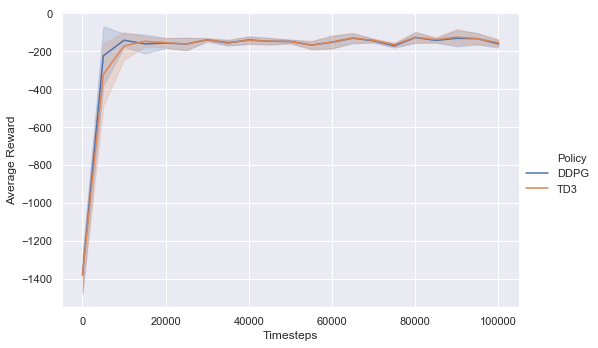

In [178]:
plot_results(ddpg, td3)

---